In [1]:
##development
%load_ext extension_notebook_splitter

<div>
    <img src="static/FHAachen-logo2.svg" style="float: right;height: 15em;">
</div>

<div>
    <img src="static/IIIPIB_RWTH.png" style="float: right;height: 6.5em;">
</div>

<p style="font-size:12pt";> <b> Einführung in die Physik -  Sommersemester 2021</b> <br>
<b> Prof. Dr. Mottaghy, Prof. Dr.  Roth </b><br>
<b> Fachbereich Energietechnik/  Lehrstuhl für Experimentalphysik III B  </b>
</p>
    
## Übung 6: Wärme

----
1. [Konvektion](#1)
2. [Thermische Ausdehnung](#2)
3. [Wärmeenrgie](#3)
4. [Wärmeleitung](#4)
---


<div style=" border: 2px solid black;margin: 10px auto; padding: 10px; border-radius: 10px;">
  
### Wärmetransport
Wärme als Energieform kann auf unterschiedliche Weise übertragen werden:
- **Konvektion**: Transport in und mit einem Stoff
- **Wärmeleitung**: Transport durch Materie hindurch
- **Wärmestrahlung**: Transport durch elektromagnetische Wellen

Im Folgenden beschäftigen wir uns mit der Konvektion:
    
#### Konvektion - Newton’schen Abkühlungsgesetz

Zu welchem Zeitpunkt eine sich abkühlende Flüssigkeit (ein heißes Getränk) eine bestimmte Temperatur erreicht. Dabei gehen wir von einer konstanten Außentemperatur $T_a$ aus. $T(0)=T_0$ ist als die Anfangstemperatur der Flüssigkeit zum Zeitpunkt 0 definiert. Die Flüssigkeit gibt so lange Wärme an die Umgebung ab, bis ein thermodynamisches Gleichgewicht entstanden ist in dem Sinne, dass beide Temperaturen gleich sind. Dieser Prozess erfolgt nach dem **Newton’schen Abkühlungsgesetz**:


$$\frac{\text{d}T}{\text{d}t} =\dot{T}(t) = -\alpha (T(t)-T_a)$$ 

mit $\alpha > 0$ Abkühlungsrate.

    
<table cellpadding="0"><tbody><tr>
<td>
<p style="text-align:center;font-size:small;">
<img img src="static/kaffee2.jpg" alt="" role="presentation" class="img-responsive atto_image_button_middle" style="height: 20em;">
<br>
<b>Abbildung</b>: Kaffe
</p>
</td>
<td width="20"></td>
<tr>
</tr>
</tbody></table>


Bei der Aufgabe 3 (Fadenpendel) letzter Übung haben wir den *expliziten Euler-Verfahren* eingeführt, für  $\dot{T}(t)$  lautet er:

$$\dot{T}(t_{i}) \approx \frac{T( t_{i+1})-T(t_{i})}{\Delta t}$$

$$\Rightarrow T( t_{i+1}) \approx  T(t_{i}) + \dot{T}(t_{i})\cdot \Delta t $$

mit dem Anfangswert $T_0=T(0)$
    
    
</div>

<div style=" border: 2px solid #81bdec;; margin: 10px auto; padding: 10px; border-radius: 10px;">
<h4>
    <i class="fas fa-laptop-code"></i> <code>while</code>-Schleife
</h4>
    

Eine `while`-Schleife kann man in folgender Form deklarieren:
```python
i = a         # Anfangswert des Iterators
n = b         # Endwert des Iterators 
while Bedingung:  # Beziehung zwischen i und n mit rationalen oder logischen Operatoren.
    Anweisungen
    i = i + 1 # Inkrement des Iterators
```

In einer `while`-Schleife werden die Anweisungen iterativ wiederholt solange die Schleifenbedingung gültig ist. Die Schleife führt diese Anweisungen nur dann aus, wenn die Bedingung wahr ist.

Als Anwendungsbeispiel werden wir den Winkel $\theta$ mit Hilfe der Winkelgeschwindigkeit $\omega$ berechnen 
$$\omega = \frac{\text{d}\theta}{\text{d}t} \Rightarrow \omega(t_i) \approx \frac{\theta(t_{i+1})-\theta(t_{i})}{t_{i+1}-t_{i}}$$
für kleine Zeitschritte $\Delta t$ können wir $\theta$ wie folgt numerisch berechnen:
$$\theta_{i+1} = \theta_i + \omega\cdot\Delta t$$


0. Laden von Messdaten (dieser Teil ist nicht notwendig, um mit einer `while`-Schleife zu arbeiten):

```python
import numpy as np
x, omega = np.loadtxt('omega_data.dat',usecols=[0,1],unpack=True)
```    
1. Parameter und Anfangswerte für die `while`-Schleife erstellen, hier betragen die gesamte Zeit $T = 60 ~\text{s}$ (das entspricht auch die Endbedigung der Schleife) und der Zeitschritt $\Delta t = 0,1~\text{s}$.

```python
# Parameter
T = 60
dt = 0.1

# Anfangswerte
t = 0
theta = 0
i = 0
```
2. Erstellen Sie eine leere Liste zum Speichern der berechneten Werte.

```python
theta_werte = []
t_werte = []
```

3. Wählen Sie Ihren Iterator für die Schleife, hier werden wir den Winkel berechnen, solange `t` den Wert `T` nicht überschreitet, das entspricht der Bedingung der `while`-Schleife.

```python
t = 0
while t < T:

    t = t + dt                    # Neue Zeit
```

Bitte vergessen Sie nicht, dass jedes Mal, wenn Sie eine Berechnung machen, der Iterator zum nächsten Wert weitergehen muss, dies wird mit `t = t + dt` und `i = i + 1` gemacht, wir  empfehlen Ihnen, es zu schreiben, bevor Sie Ihre Anweisung schreiben, denn wenn Sie es vergessen, werden Sie mir eine endlose Schleife erstellen, die manchmal wirklich lästig sein kann.

4. Anweisungen deklarieren. In diesem Fall lautet unsere Anweisungen:     
    i. $\theta_{i+1} =  \theta_i + \omega_i \cdot \Delta t$      
    ii. $t_{i+1} = t_i + \Delta t$    
    iii. $i = i + 1$ 

```python
while t < T:
    theta = theta + omega[i]*dt 
    theta_werte.append(theta)
    t = t + dt                    # Neue Zeit
    t_werte.append(t)
    i = i + 1                     # Nächster ω-Wert
```

5. Die `while`-Schleife ist fertig und nun können Sie die berechneten Werte für weitere Operationen verwenden, in diesem Fall werden wir unsere Ergebnisse plotten.

```python
import matplotlib.pyplot as plt

plt.plot(t_werte, theta_werte, label = r'$\theta$')
plt.xlabel('Zeit in $s$')
plt.ylabel(r'$\theta$ in -')
plt.legend(loc=4)
```
   
</div>

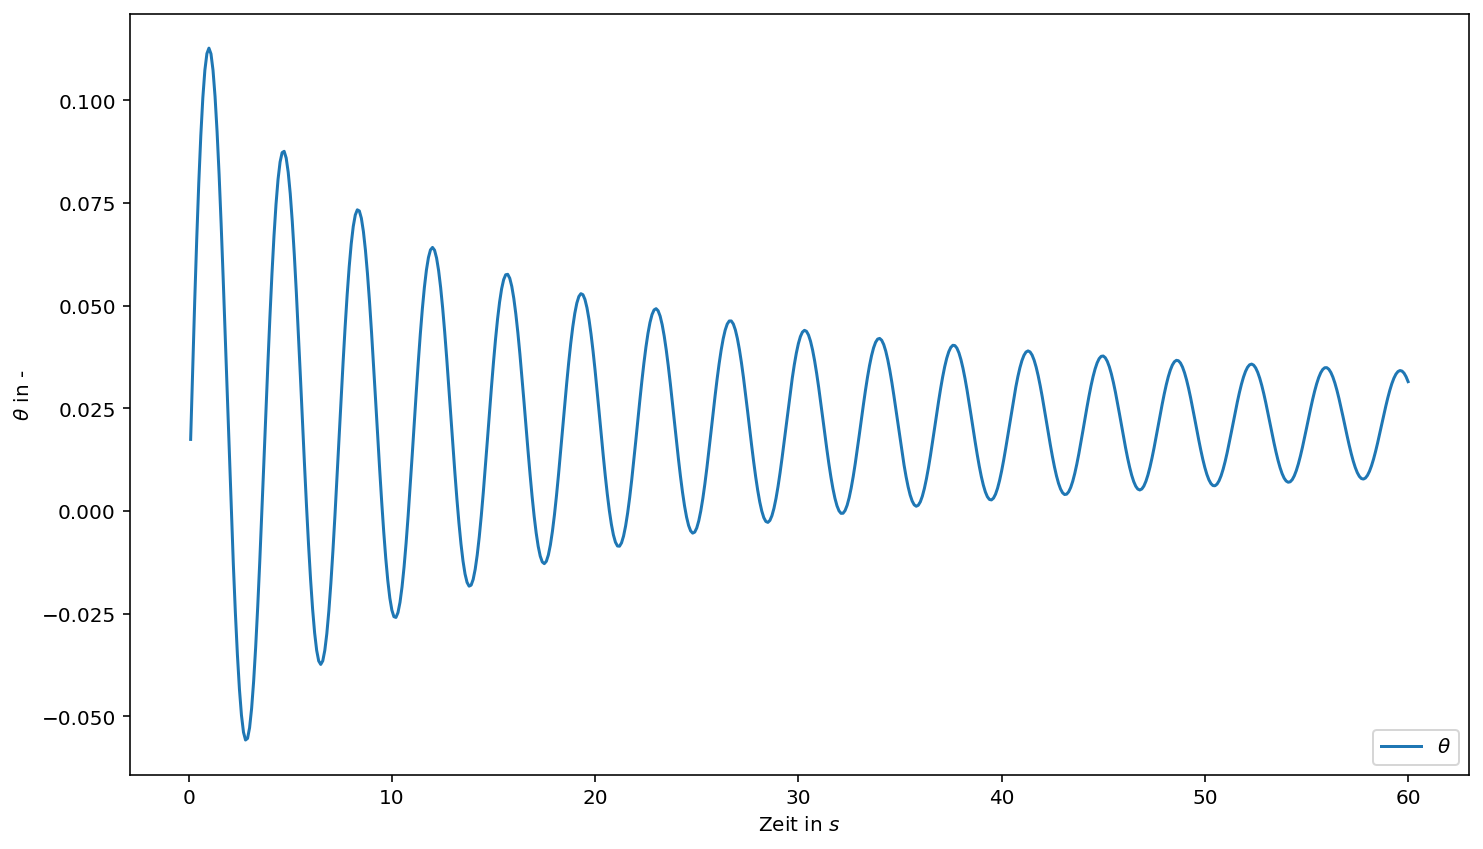

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x, omega = np.loadtxt('omega_data.dat',usecols=[0,1],unpack=True)

# Parameter
T = 60
dt = 0.1

# Anfangswerte
t = 0
theta = 0
i = 0

theta_werte = []
t_werte = []
while t < T:
    theta = theta + omega[i]*dt 
    theta_werte.append(theta)
    t = t + dt                    # Neue Zeit
    t_werte.append(t)
    i = i + 1

plt.plot(t_werte, theta_werte, label = r'$\theta$')
plt.xlabel('Zeit in $s$')
plt.ylabel(r'$\theta$ in -')
plt.legend(loc=4)

<div class="alert alert-block alert-danger">
<b>Vorsicht!</b> 
<ul>
<p>  
Eine <b>Endlosschleife</b> tritt auf, wenn der Wert von Bedingung niemals den Wert <code>False</code> annimmt. Dieser Fall passiert, wenn Sie den Wert von Bedingung im Block nicht ändern oder wenn Sie die Vergleichsoperatoren falsch implementieren. Sie können eine Endlosschleife beenden, indem Sie den Kernel stoppen.
 </p>      
</div>

<div style= "color: black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px">
<p style="font-size:12pt; text-align:center; color:   black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>  Aufgabe 1 </b>  </p> 

Eine Tasse Kaffee mit einer Anfangstemperatur von $85 \mathrm{°C}$, das wir zum Abkühlen bei einer Außentemperatur von $20 \mathrm{°C}$ stellen. Gesucht ist der Zeitpunkt, zu dem der Kaffee auf ungefähr $30 \mathrm{°C}$ abgekühlt ist.

$T_0=85\mathrm{°C}$

$\alpha = 0.005 \text{ s}^{-1}$

$T(t_{Ende})=30\mathrm{°C}$
</div>    

**a)** Erstellen Sie eine `while`-Scheife für die numerische Berechnung von $T( t_{i+1})$, verwenden Sie die Endtemperatur als Endbedingung. 

*Hinweis*: Die `while`-Schleife ist vorbereitet. Sie sollen nur die **Endbedingung** und die **Anweisungen** innerhalb der Schleife angeben: es gibt jedes Mal das Inkrement der Zeit und die Berechnung der Temperatur.

In [3]:
%%solution
# Die Listen werden Sie für das Diagramm brauchen.
zeit = []
temperatur = []

# Parameter
T_a = 20       # Temperatur in °C
T_0 = 85       # Anfangswert Temperatur in °C
t = 0          # Anfangswert Zeit = 0
delta_t = 5    # Zeitschritt  
T_ende = 30
alpha = 0.005  # Abkühlungsrate
y = T_0        # Starttemperatur der Schleife

while y >= T_ende:
    t = t + delta_t

    y = y + delta_t*(-alpha*(y - T_a))

    # Die Listen werden Sie für das Diagramm brauchen.
    temperatur.append(y)
    zeit.append(t)
    
print('Der Kaffee erreicht nach %2.1f s eine Temperatur von %2.1f °C.' %(t,y)) 

Der Kaffee erreicht nach 370.0 s eine Temperatur von 30.0 °C.


In [4]:
%%task
# Die Listen werden Sie für das Diagramm brauchen.
zeit = []
temperatur = []

# Parameter
T_a =       # Außentemperatur in °C
T_0 =       # Anfangswert Temperatur in °C
t =         # Anfangswert Zeit = 0
delta_t = 5 # Zeitschritt 
T_ende =
alpha =     # Abkühlungsrate
y =         # Starttemperatur der Schleife

while y # TODO :
    t = # TODO

    y = # TODO

    # Die Listen werden Sie für das Diagramm brauchen.
    temperatur.append(y)
    zeit.append(t)

# Ergebnis Ausgeben 
print() 

**b)** Erstellen Sie das $t-T(t)$-Diagramm mit Hilfe der Liste `temperatur` und `zeit` der vorherigen Teilaufgabe.

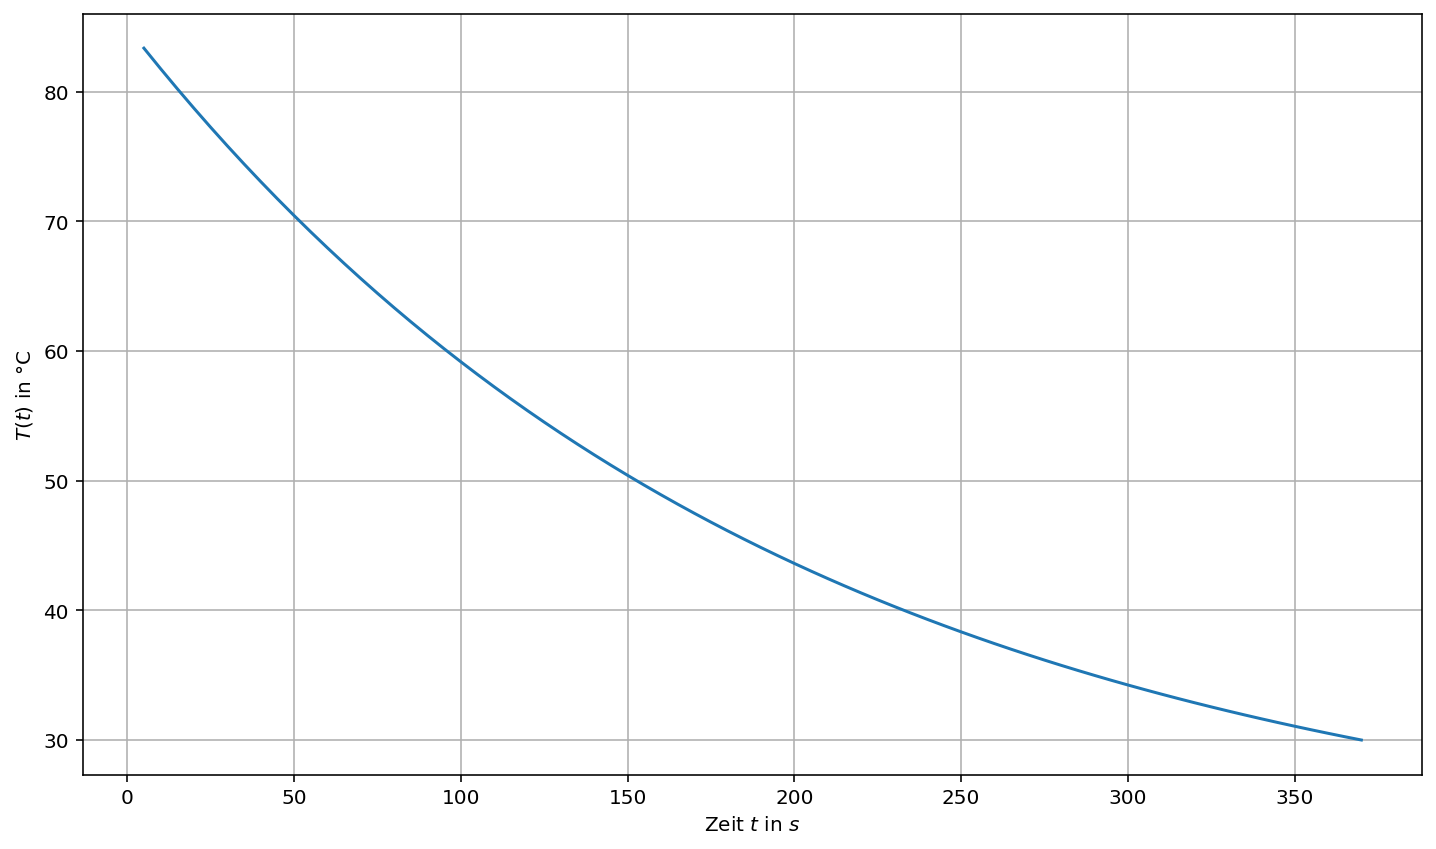

In [5]:
%%solution
import matplotlib.pyplot as plt

plt.plot(zeit, temperatur)
plt.xlabel('Zeit $t$ in $s$')
plt.ylabel('$T(t)$ in °C')
plt.grid(True)

In [6]:
%%task
import matplotlib.pyplot as plt


<div style=" border: 2px solid black;margin: 10px auto; padding: 10px; border-radius: 10px;">

### Thermische Ausdehnung 

Die Wärmeausdehnung eines Festkörpers lässt sich mit Hilfe des
**thermische Ausdehnungskoeffizienten** $\alpha$ beschreiben:

$$\Delta L = \alpha \cdot L_0\cdot \Delta T$$

<img src="static/ausde.jpg" align="center"/>

Bei Flüssigkeiten ist die Form durch das Gefäß, in dem sich die Flüssigkeit befindet, vorgegeben. Deshalb wird hier die Betrachtung der
Volumenausdehnung relevant. Bei der Volumenänderung dehnt sich die
Flüssigkeit in alle drei Raumrichtungen aus, der Volumenausdehnungskoeffizient $\beta$ ist deshalb dreimal so groß wie der lineare ($\beta = 3\alpha$):

$$ \Delta V =  \beta \cdot V_0\cdot \Delta T$$
</div>

<div style="background-color:#f6f6f6;border:1px solid #707070;padding:0.5em 1em;box-sizing:border-box;">
<i class="fas fa-square-root-alt"></i> <b>Erinnerung aus der Mathematik:</b> Taylorentwicklung  

Für viele Zwecke ist es handlicher mit der Näherung einer Funktion zu arbeiten, als mit der exakten Lösung, im Grunde haben wir das schon bei der Lösung der DGL des Fadenpendels gesehen, bei der wir $\sin(\varphi)$ durch $\varphi$ für kleine Winkel genährt haben. 

Im Allgemeinen können wir eine beliebig oft differenzierbare Funktion, die auf einem offenen Intervall definiert ist, an einer Stelle $x_0$ im Definitionsbereich durch das sog. Taylorpolynom der Ordnung $N$ mithilfe der Ableitungen $f^{(n)}$ nähern:
$f(x)\approx  \sum _{n=0}^{N}{\frac {f^{(n)}(x_0)}{n!}}(x-x_0)^{n}$. In erster Ordnung, d.h. $N=1$ wird damit die Funktion durch die Tangente an dem Entwicklungspunkt $x_0$ genähert.

`Scipy` kann uns beim Bestimmen der Ableitungen helfen. Wir betrachten die reelle Funktion $f(x)= (1+x)^3$ und entwickeln diese um $x_0=0$. Um die Variable x noch offen zu lassen, rechen wir symbolisch mit dem Paket `Sympy`.

</div>

In [7]:
#Erstmal 'per Hand'
import sympy as sym #symbolisches Rechenen
import math

def f(x):
    return (1+x)**3 

#Taylorformel
def f_approx(x_0, N):
    sum=f(x_0)
    x=sym.Symbol('x') #x ist als symbolische Variable deklariert
    for i in range(1,N+1):#range lässt i laufen von 1 bis N
        sum= sum + sym.diff(f(x), x)/math.factorial(i) *(x-x_0)**(i)
    return sum

print('T1f(x)=',f_approx(0,1))# Näherung an der Stelle 0 bis zur ersten Ordung
print('T3f(x)=', f_approx(0,3)) # Näherung an der Stelle 0 bis zur ersten Ordung

T1f(x)= 3*x*(x + 1)**2 + 1
T3f(x)= x**3*(x + 1)**2/2 + 3*x**2*(x + 1)**2/2 + 3*x*(x + 1)**2 + 1


In [8]:
#nun der Shortcut
x=sym.Symbol('x') #global definiert

print('T3f(x)=',sym.series(f(x),x))# Näherung an der Stelle 0 bis zur dritten Ordung

#hier auch die Kleinwinkelnäherung des Sinus
print('sin(x)=',sym.series(sym.sin(x), x))

T3f(x)= x**3 + 3*x**2 + 3*x + 1
sin(x)= x - x**3/6 + x**5/120 + O(x**6)


<div style= "color: black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px">
<p style="font-size:12pt; text-align:center; color:   black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="2"><b>  Aufgabe 2 </b>  </p> 
Ein quaderförmiger Stahltank mit einem Volumen von $50~\mathrm{l}$ wird bei $10 \mathrm{°C}$ mit $49~\mathrm{l}$  Benzin gefüllt. Die Temperatur steigt nun weiter an. Bei welcher Temperatur läuft der Tank aus? Um das zu beantworten:
</div>

1. Plotten Sie die Volumenausdehnung des Benzins und des Stahltanks als Funktionen der Temperatur. Was besagt der Schnittpunkt?

Volumenausdehnungskoeffizient Benzin $\gamma = 1,05 ⋅ 10^{-3}$ K⁻¹ 

Längenausdehnungskoeffizient Stahl $\alpha = 1,3 ⋅ 10^{-5}$ K⁻¹

In [9]:
%%task
import matplotlib.pyplot as plt
import numpy as np

gamma= 1.05/10**3 #Volumenausdehnungskoeffizient Benzin
alpha= 1.3/10**5  #Längenausdehnungskoeffizient Stahl
T_0= 10 #°C
V_Benzin= 49 #l
V_Tank= 50 #l 

def Delta_Benzin(T):
    return #TODO

def Delta_Tank(T):
    return #TODO


T= np.linspace(10,50)#von 10 bis 50°
plt.title('Stahltank mit Benzin')
plt.plot(T,Delta_Benzin(T), label= 'Volumen Benzin' )
plt.plot(T,Delta_Tank(T), label= 'Volumen Stahltank')
plt.xlabel('Temperatur /°')
plt.ylabel('Volumen/ l')
plt.legend()
plt.grid()

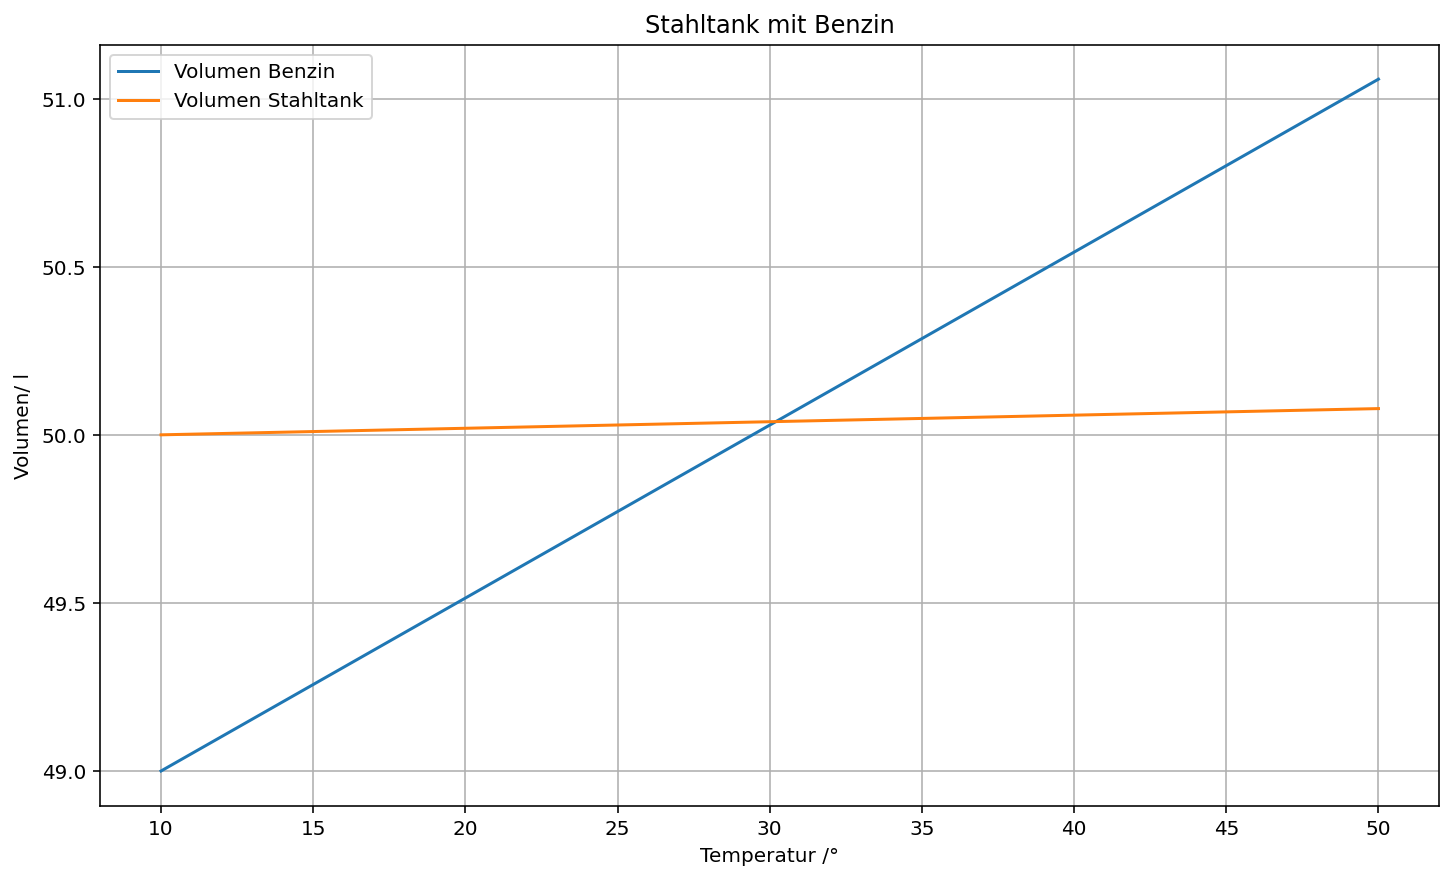

In [10]:
%%solution
import matplotlib.pyplot as plt
import numpy as np

gamma= 1.05/10**3 #Volumenausdehnungskoeffizient Benzin
alpha= 1.3/10**5  #Längenausdehnungskoeffizient Stahl
T_0= 10 #°C
V_Benzin= 49 #l
V_Tank= 50 #l 

def Delta_Benzin(T):
    return V_Benzin*(1+gamma*abs(T_0-T))

def Delta_Tank(T):
    return V_Tank*(1+alpha*abs(T_0-T))**3


T= np.linspace(10,50)#von 10 bis 50°
plt.title('Stahltank mit Benzin')
plt.plot(T,Delta_Benzin(T), label= 'Volumen Benzin' )
plt.plot(T,Delta_Tank(T), label= 'Volumen Stahltank')
plt.xlabel('Temperatur /°')
plt.ylabel('Volumen/ l')
plt.legend()
plt.grid()

**b)**
Leiten Sie die maximal mögliche Temperaturänderung per Hand her.
Vergleichen Sie beide Ergebnisse.

*Hinweis*: Für $(1 + x)^3$ kann obige Taylorentwicklung um die 0 bis zur ersten Ordnung verwendet werden.

<div class="alert alert-block alert-info">
<b>Code Tipps:</b> 
<ul>  
<li>mit <code>abs(x)</code> erhalten sie den Betrag einer Variable <code>x</code>
<li>da die mit dem Computer berechneten Werte i.A. nicht exakt sind, ist ein Vergleich mit mit einer Zahl nicht zielführend. Mit <code>np.isclose(Variable, Vergleichswert, atol=AbsoluteToleranz)</code>, ist dies jedoch möglich. Am besten wäre die Bedingung unabhängig von Zahlenwerten zu beschreiben
    </ul>
</div>

In [11]:
%%task
#einmal numerisch den Schnittpunkt mit isclose
T_kritisch=0
for t in T:
    if np.isclose(#TODO,#TODO, atol=0.03): #welche Werte sollen verglichen werden?
        T_kritisch=t
        
#nun mithilfe der Formel und der Näherung (1+x)**3 = 1+3x
T_kritisch_2=#TODO

print('Die Abweichung des ersten Verfahrens zum zweiten ist ',round( abs( T_kritisch-T_kritisch_2),3), '°' )

**Lösung**
 
$$ V_{\text{Benzin}} = V_{0\text{Benzin}}(1+\gamma\Delta T)$$

$$ V_{\text{Tank}} = V_{0\text{Tank}}(1+\alpha\Delta T)^3 ≈ V_{0\text{Tank}}(1+3 \alpha\Delta T)$$
Falls die folgende Differenz 0 wird, so ist das die kritische Temperatur nachdem das Fass überläuft.

$$V_{\text{Benzin}} - V_{\text{Tank}}   = V_{0\text{Benzin}}(1+\gamma\Delta T) - V_{0\text{Tank}}(1+3 \alpha\Delta T) \\
 = V_{0\text{Benzin}}-V_{0\text{Tank}} + \Delta T \cdot (\gamma V_{0\text{Benzin}}- 3 \alpha V_{0\text{Tank}})\\
\Leftrightarrow \Delta T= \frac{V_{0\text{Benzin}}-V_{0\text{Tank}}}{3 \alpha V_{0\text{Tank}}-\gamma V_{0\text{Benzin}}}$$

In [12]:
%%solution
#einmal numerisch den Schnittpunkt mit isclose
T_kritisch=0
for t in T:
    if np.isclose(Delta_Benzin(t),Delta_Tank(t), atol=0.03):
        T_kritisch=t
        
#nun mithilfe der Formel und der Näherung (1+x)**3 = 1+3x
T_kritisch_2=T_0+ (V_Benzin-V_Tank)/ (3*alpha*V_Tank-gamma*V_Benzin)

print('Die Abweichung des ersten Verfahrens zum zweiten ist ',round( abs( T_kritisch-T_kritisch_2),3), '°' )

Die Abweichung des ersten Verfahrens zum zweiten ist  0.206 °


<div style=" border: 2px solid black;margin: 10px auto; padding: 10px; border-radius: 10px;">

### Wärmeenergie

Führt man einem Körper eine definierte Energie zu, so stellt man fest, dass seine Temperatur um einen Betrag $\Delta T$ steigt. Man nennt die in den Körper hineingesteckte Energie, die zur Temperaturerhöhung $\Delta T$ führt, die Änderung $\Delta Q$ seiner **Wärmeenergie** $Q$ (oft auch **Wärmemenge**
genannt). Es gilt:
$$ \Delta Q = c\cdot m \cdot \Delta T $$
Die Wärmemenge erweist sich als eine **Energieform**. Ihre SI-Einheit ist daher das Joule. 

Die **spezifische Wärme** $c$ ist definiert als diejenige Wärmemenge, die erforderlich ist, um ein Kilogramm des betreffenden Stoffes um 1 °C (bzw. um 1 K) zu erwärmen:

|Stoff|c [kJ·kg⁻¹·K¹]|
|:------|:------|
|Eis   | 2,05 |
|Wasser (flüssig)   | 4,18 |
|Wasserdampf (gasförmig)   |2,02|
|Gold   | 0,126|
|Kupfer  | 0,140 |

#### Phasenübergänge und latente Wärme
Die mit Phasenübergängen verbundene Wärme heißt "**latente Wärme**" oder Umwandlungswärme.

Die benötigte Energie für den Phasenübergang ist mit der spezifischen
**Schmelz-** bzw. **Verdampfungsenthalpie** $L$

$$Q = m\cdot L$$

<img src="static/phase.jpg" align="center"/>

Das obige Diagramm beschreibt die Zustandsänderungen in Bezug auf Wärmeenergie und Temperatur. Wasser hat (unter normalen Bedingungen bzw. $p=$ 1 atm) seinen Schmelzpunkt bei 0 °C und seinen Siedepunkt bei 100 °C.

- s: (von lat. *Solidus*) <font color=blue>**fester**</font> Zustand
- s/l: <font color=green>**Schmelzen**</font>  (Übergang von fest zu flüssig)
- l: (von lat. *Liquidus*) <font color=#cc7a00>**flüssiger**</font> Zustand
- l/g: <font color=#cc0066>**Verdampfen**</font> (Übergang von flüssig zu gasförmig) 
- g: <font color=red>**gasförmiger**</font> Zustand 
</div>

<div style= "color: black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px">
<p style="font-size:12pt; text-align:center; color:   black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="3"><b>  Aufgabe 3 </b>  </p>
Die $100~\mathrm{ml}$ Wasser in einem Cocktailglas sollen von der Raumtemperatur $21 \mathrm{°C}$ auf eine Temperatur von $7 \mathrm{°C}$ mit Hilfe von Eiswürfeln abgekühlt werden. Es stehen Eiswürfel der Masse $10~\mathrm{g}$ aus einem Tiefkühlfach der Temperatur $-18 \mathrm{°C}$ zur Verfügung. Wie viele Eiswürfel werden benötigt?
 
Spezifische Wärmekapazität von Wasser:     $4,2⋅10³ ~\mathrm{J⋅kg⁻¹ K⁻¹}$          
Spezifische Wärmekapazität von Eis:   $2,1⋅10³~\mathrm{J⋅kg⁻¹ K⁻¹}$          
Spezifische Schmelzwärme von Eis:   $3,3⋅10⁵ ~\mathrm{J⋅kg⁻¹}$
</div>       

**a)** Leiten Sie auf dem Papier eine Formel für die Anzahl der Eiswürfel her, dafür sollen Sie die Wärme in verschiedenen Zuständen berechnen.

**Lösung**

$\Delta T_1 = 0 \, ^\circ \text{C} -(-18) \, ^\circ \text{C} = 18 \text{ K}$

$\Delta T_2 = 7 \, ^\circ \text{C} - 0 \, ^\circ \text{C} = 7 \text{ K}$

$\Delta T_3 = 21 \, ^\circ \text{C} - 7 \, ^\circ \text{C} = 14 \text{ K}$


Eis $-18°C \rightarrow 0 °C$:

$$Q_{_{-18 \, ^\circ \text{C} \rightarrow 0 \, ^\circ \text{C}}} = c_{eis} \cdot m_{eis} \cdot  \Delta T_1 = 378 \text{ J}$$

Schmelzwärme:

$$Q_{_S} = L_s \cdot m_{eis} = 3300 \text{ J}$$

geschmolzenes Eis $0°C \rightarrow 7 °C$:

$$Q_{_{0 \, ^\circ \text{C} \rightarrow 7 \, ^\circ \text{C}}} = c_{w} \cdot m_{eis} \cdot  \Delta T_2 = 294 \text{ J}$$

Wasser $21°C \rightarrow 7 °C$:
$$Q_{_{-18 \, ^\circ \text{C} \rightarrow 0 \, ^\circ \text{C}}} = c_{w} \cdot m_{w} \cdot  \Delta T_3 = 5880 \text{ J}$$

Gesamt:



$$\Delta Q_{\text{Wasser}} \approx 5,9 \text{ kJ}$$

$$\Delta Q_{\text{Eiswürfel}} = Q_{_{-18 \, ^\circ \text{C} \rightarrow 0 \, ^\circ \text{C}}} + Q_{_S} + Q_{_{0 \, ^\circ \text{C} \rightarrow 7 \, ^\circ \text{C}}} =4,0 \text{ kJ}$$

$$\left \lceil{\frac{\Delta Q_{\text{Wasser}}}{\Delta Q_{\text{Eiswürfel}}}}\right \rceil = 2$$

Es werden mindestens 2 Eiswürfel benötigt.

<div class="alert alert-block alert-info">
<b>Code Tipps:</b> 
<ul>  
<b>Aufrundungsfunktion</b> Manchmal ist es notwendig, einen ganzzahligen Wert von Objekten zu berechnen, zum Beispiel dürfen wir in einem Supermarkt normalerweise nicht eine Orange und die Hälfte einer anderen kaufen, sondern entweder 1 oder 2 Orangen. 
<li> Für eine reelle Zahl $x$ ist $\lceil x \rceil$ die kleinste ganze Zahl, die größer oder gleich $x$ ist, z.B.:
$$\lceil 2,8 \rceil = 3 $$
    <li> Diese Funktion ist in Python unter <code>math.ceil() </code> aufrufbar.
    </ul>
</div>

**b)** Berechnen Sie das numerische Ergebnis in der folgenden Code-Zelle.

In [13]:
%%solution
import math

V_wasser = 100e-3*0.001  # in m³
rho_wasser = 1000     # in kg/m³
m_wasser = V_wasser*rho_wasser
c_wasser = 4.2e3      # in J kg⁻¹K⁻¹
T1_wasser = 21
T2_wasser = 7

m_eis = 0.01          # in kg
c_eis = 2.1e3         # in J kg⁻¹K⁻¹
T1_eis = -18

c_L = 3.3e5 # J kg⁻¹
T_L = 0

# -18 °C -> 0° C
Q_eis_eis = m_eis*c_eis*(T_L - T1_eis)
# Schmelzwärme
Q_L = m_eis*c_L
# geschmolzenes Eis 0°C -> 7 °C
Q_eis_wasser = m_eis*c_wasser*(T2_wasser-T_L)

Q_eis = Q_eis_eis + Q_L + Q_eis_wasser

Q_wasser = m_wasser*c_wasser*(T1_wasser-T2_wasser)

Anzahl_eis = math.ceil(Q_wasser/Q_eis)

print("Es werden mindestens",Anzahl_eis, "Eiswürfel benötigt")

Es werden mindestens 2 Eiswürfel benötigt


In [14]:
%%task
import math

V_wasser =       # Volumen in m³
rho_wasser =     # Dichte in kg/m³
m_wasser =       # Masse in kg
c_wasser =       # spe. Wärmekapazität in J kg⁻¹K⁻¹
T1_wasser =      # Temperatur in °C
T2_wasser =      # Temperatur in °C

m_eis =          # Masse in kg
c_eis =          # in J kg⁻¹K⁻¹
T1_eis = 

c_L =            # spe. Wärmekapazität in J kg⁻¹K⁻¹
T_L =            # Temperatur in °C

# -18 °C -> 0° C
Q_eis_eis = 

# Schmelzwärme
Q_L = 

# geschmolzenes Eis 0°C -> 7 °C
Q_eis_wasser = 

Q_eis = 

Q_wasser = 

Anzahl_eis = 

print()

**c)** Skizzieren Sie den Temperaturverlauf des Eiswürfels mit der Änderung seiner Wärmeenergie.

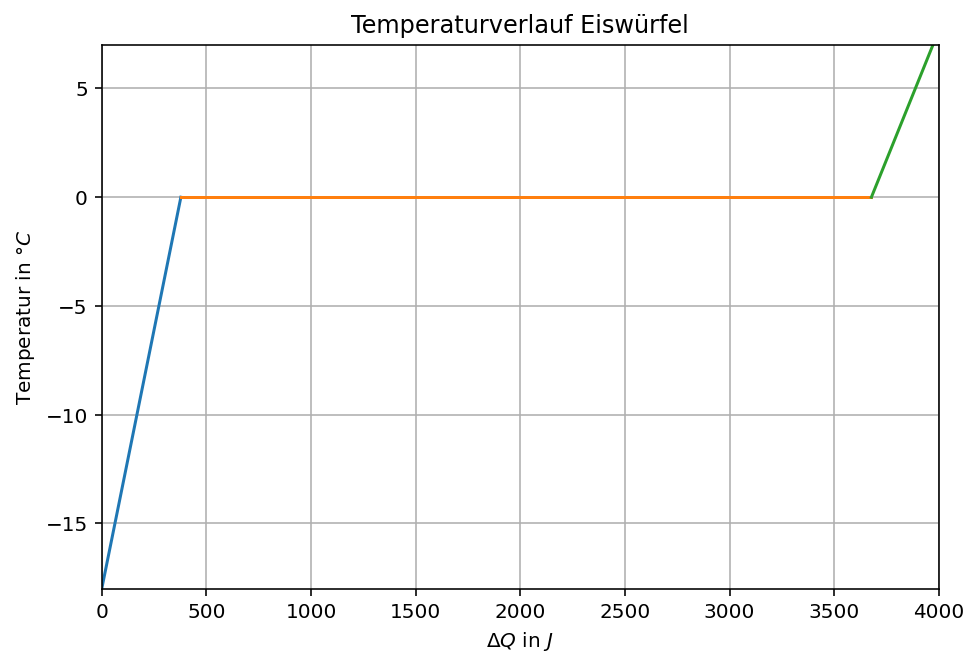

In [15]:
%%solution
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(7.5, 5))
plt.plot([0, Q_eis_eis], [-18, 0])
plt.plot([Q_eis_eis,Q_L+Q_eis_eis],[0, 0])
plt.plot([Q_L+Q_eis_eis, Q_L+Q_eis_eis+Q_eis_wasser],[0, 7])
plt.xlabel('$\Delta Q$ in $J$')
plt.ylabel('Temperatur in $°C$')
plt.title('Temperaturverlauf Eiswürfel')
plt.axis([0, 4000, -18, 7])
plt.grid()

In [16]:
%%task
import matplotlib.pyplot as plt



<div style=" border: 2px solid black;margin: 10px auto; padding: 10px; border-radius: 10px;">

#### Wärmeleitung


Für die **Wärmeleitung** lautet das Naturgesetz: *Wärme strömt vom warmen Gebiet zum kalten. Das geschieht umso schneller, je höher die Temperaturdifferenz ist*. Dieses Naturgesetz wird durch das **Fourier'sche Gesetz** beschrieben:

$$\dot{\vec{q}} = - \lambda\vec{\nabla} T$$


Im **eindimensionalen** Fall ($x$-Ortskoordinate) wird die Formel geschrieben als:

$$\dot{q} =- \frac{\lambda}{d}(T_2 - T_1)$$

die Proportionalitätskonstante $\lambda$ nennt man **Wärmeleitfähigkeit**, sie wird meinstens in W m⁻¹K⁻¹ angegeben. 

<img src="static/wl12.jpg" align="center"/>

Wir sehen uns den Fall der **Wärmeleitung durch eine Wand** (stationärer Fall) mit der
Dicke $d$ an:

Der **Temperaturverlauf** ist:

$$T(x) = (T_2 - T_1)\frac{x}{d}+T_1$$

Die **Wärmestromdichte** bzw. der **Wärmestrom**:

$$\dot{q} =- \frac{\lambda}{d}(T_2 - T_1) \text{ und } \dot{Q} = \frac{A}{d}\lambda(T_2 - T_1)$$

Ein wichtiger Parameter dabei ist der Wärmeleitwiderstand $R$, im
obigen Beispiel lautet er:

$$R_{12} := \frac{d}{\lambda A}.$$

Für eine Wand mit mehreren Materialschichten:

$$\dot{q} = - \frac{1}{\sum^n_{i=1}\frac{d_i}{\lambda_i}} (T_{2} - T_{1})$$
</div>

<div style= "color: black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px">
<p style="font-size:12pt; text-align:center; color:   black;background-color: rgba(0,177,172, 0.1) ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="4"><b>  Aufgabe 4 </b>  </p>Eine Hauswand besteht aus einer tragenden Betonwand der Dicke $20 \mathrm{cm}$ und einer darauf aufgeklebten Isolierschicht aus Polystyrol der Dicke $15 \mathrm{cm}$. Welche Temperatur herrscht am Übergang zwischen Beton und Isolierschicht, wenn die Innentemperatur $20\mathrm{°C}$ und die Außentemperatur $-10\mathrm{°C}$ beträgt?

Wärmeleitfähigkeit Beton:  $2,1~\mathrm{W⋅K⁻¹ m⁻¹}$    
Wärmeleitkoeffizient Polystyrol: $0,03~\mathrm{W⋅K⁻¹ m⁻¹}$
</div>

**a)** Leiten Sie auf dem Papier eine Formel für $T_ü$ her.

**Lösung**

$$\dot{q} =-\frac{1}{\frac{d_{\text{Beton}}}{\lambda_{\text{Beton}}}+\frac{d_{\text{Poly}}}{\lambda_{\text{Poly}}}} \Delta T= -\frac{\lambda_{\text{Beton}}}{d_{\text{Beton}}}\Delta T_{\text{Beton}} = -\frac{\lambda_{\text{Poly}}}{d_{\text{Poly}}}\Delta T_{\text{Poly}}$$

$$\Rightarrow \Delta T_{\text{Poly}} = \frac{\Delta T}{1 + \frac{\lambda_{\text{Poly}}}{d_{\text{Poly}}} \frac{d_{\text{Beton}}}{\lambda_{\text{Beton}}}} = 29,4 \text{ K}$$

$$\Rightarrow T_{\text{ü}} = (29,4 + (-10))\text{ °C} =19,5\text{ °C}$$


**b)** Berechnen Sie das numerische Ergebnis in der folgenden Code-Zelle.

In [17]:
%%solution
lambda_b = 2.1  # Wärmeleitfähigkeit in W K⁻¹ m⁻¹
lambda_p = 0.03 # Wärmeleitfähigkeit in W K⁻¹ m⁻¹
d_b = 0.20      # Dicke in m
d_p = 0.18      # Dicke in m
T_a = -10       # Temperatur in °C
T_i = 20        # Temperatur in °C

DeltaT_poly = (T_i-T_a)/(1+(lambda_p*d_b)/(lambda_b*d_p))

T_uebergang = DeltaT_poly + T_a

print('Die Übergangstemperatur zwischen Beton und Isolierschich beträgt %2.1f °C.' %(T_uebergang))

Die Übergangstemperatur zwischen Beton und Isolierschich beträgt 19.5 °C.


In [18]:
%%task
lambda_b =   # Wärmeleitfähigkeit in W K⁻¹ m⁻¹
lambda_p =   # Wärmeleitfähigkeit in W K⁻¹ m⁻¹
d_b =        # Dicke in m
d_p =        # Dicke in m
T_a =        # Temperatur in °C
T_i =        # Temperatur in °C

T_uebergang = 

print()

**c)** Überprüfen Sie Ihr Ergebnis mit der interaktiven Grafik.

In [19]:
from ipywidgets import interact
from exmodul import waermeleitung, lambda_b, lambda_p, d_b,  d_p
interact(waermeleitung, lambda_b=lambda_b, lambda_p=lambda_p, d_b=d_b,  d_p=d_p)

interactive(children=(FloatSlider(value=2.5, continuous_update=False, description='$\\lambda_{Beton} \\, [W K⁻…

<function exmodul.waermeleitung(lambda_b, lambda_p, d_b, d_p)>